## Observations and Insights 

1. Capomulin was the most effective in reducing tumor growth.
2. The number of male and female were almost identical.
3. Mouse weight correlation shows significant effectiveness in curing tumor growth of drug regimen.


In [453]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [454]:
# Checking the number of mice.
combined_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [455]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_df.duplicated()
combined_data_df.duplicated(keep='last')
combined_data_df.duplicated(keep=False)
combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [456]:
# Optional: Get all the data for the duplicate mouse ID. 



In [457]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicated_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

clean_combined_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(drop_duplicated_mice)==False]
clean_combined_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(drop_duplicated_mice)==False]

In [458]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [459]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_data = combined_data_df[["Drug Regimen", "Tumor Volume (mm3)"]]
groupby_data = summary_data.groupby(["Drug Regimen"])

summary_df = pd.DataFrame({
    "Mean": groupby_data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupby_data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupby_data["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupby_data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupby_data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupby_data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df


,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60
Placebo,54.03,52.29,45.00,61.17,7.82,0.58
Propriva,52.32,50.85,45.00,42.35,6.51,0.51
Ramicane,40.22,40.67,45.00,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.00,59.45,7.71,0.57


In [460]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# This method produces everything in a single groupby function
summary_stats

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

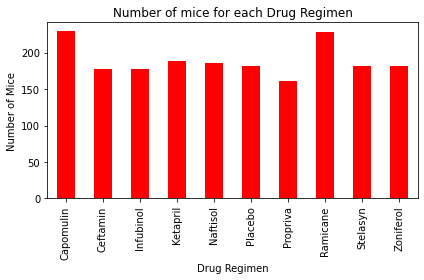

In [461]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the 
# study using pandas. 
summary_stats.plot(kind='bar', title="Number of mice for each Drug Regimen", color="red")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()

plt.savefig('PandasBarPlot.png')

plt.show()

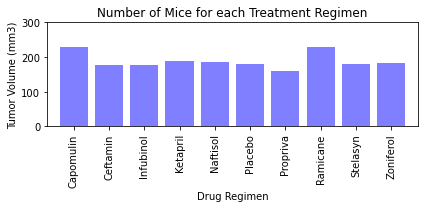

In [462]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of 
# the study using pyplot.
x_axis = np.arange(len(summary_stats))
tickLocations = [value for value in x_axis]

plt.figure(figsize=(6, 3))
plt.bar(x_axis, summary_stats, color='blue', alpha=0.5)
plt.xticks(tickLocations, list(summary_stats.index), rotation="vertical") 
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, 300)
plt.title("Number of Mice for each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()

plt.savefig('PyplotBarPlot.png')

plt.show()


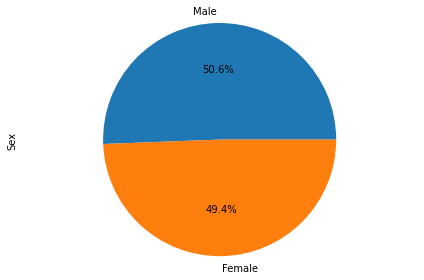

In [463]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = combined_data_df["Sex"].value_counts()
plt.figure()
gender_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.tight_layout()
plt.savefig('PandasPieChart.png')
plt.show()


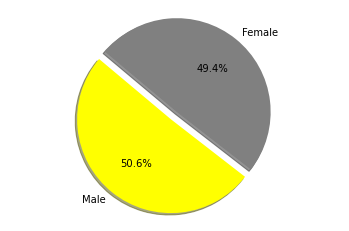

In [464]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["yellow","grey"]
explode = (0.1,0)
plt.figure()
plt.pie(gender_count.values, explode=explode, labels=gender_count.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.savefig('PyPlotPieChart.png')
plt.show()


## Quartiles, Outliers and Boxplots

In [465]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_treatment_data = combined_data_df[(combined_data_df["Drug Regimen"] == "Capomulin") | 
                          (combined_data_df["Drug Regimen"] == "Ramicane") | 
                          (combined_data_df["Drug Regimen"] == "Infubinol") | 
                          (combined_data_df["Drug Regimen"] == "Ceftamin")]

four_treatment_data = four_treatment_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
four_treatment_data = four_treatment_data.groupby(["Mouse ID", "Drug Regimen"])
four_treatment_data = four_treatment_data["Tumor Volume (mm3)"].sum().to_frame()
four_treatment_Plot = four_treatment_df["Tumor Volume (mm3)"]
four_treatment_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [466]:
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
four_last_tumor = four_treatment_data.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor

four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,563.127,NaN
a251,Last_tumor_size,NaN,NaN,552.371,NaN
a275,Last_tumor_size,NaN,527.71,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,407.014
a444,Last_tumor_size,NaN,NaN,NaN,430.601


In [467]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in four_treatment_list:
    tumor_vol_data_list.append(list(four_last_tumor_unstack[drug].dropna()))
# Determine outliers using upper and lower bounds
for drug in four_treatment_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
# Check if it is the first time through the for loop, if so then print dividing line at top only

    print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 361.82
The upper quartile of Capomulin is: 425.07
The interquartile range of Capomulin is: 63.25
The the median of Capomulin is: 398.88 
Values below 266.94 for Capomulin could be outliers.
Values above 519.94 for Capomulin could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 360.5
The upper quartile of Ramicane is: 407.01
The interquartile range of Ramicane is: 46.51
The the median of Ramicane is: 388.08 
Values below 290.74 for Ramicane could be outliers.
Values above 476.78 for Ramicane could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 250.34
The upper quartile of Infubinol is: 539.8
The interqu

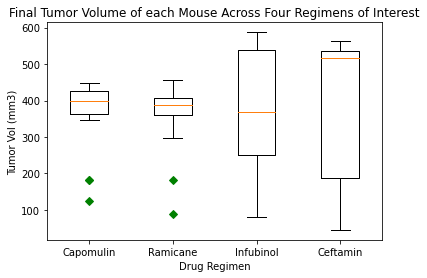

In [468]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume of each Mouse Across Four Regimens of Interest')
ax7.boxplot(tumor_vol_data_list,notch=0,sym='gD')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Vol (mm3)')
plt.xticks([1,2,3,4], four_treatment_list)
plt.savefig('BoxPlot.png')
plt.show()

## Line and Scatter Plots

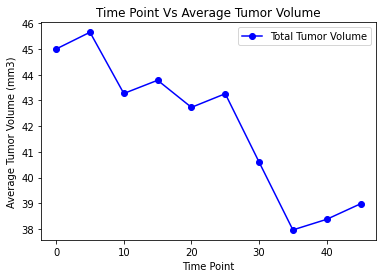

In [469]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_data = combined_data_df[(combined_data_df["Drug Regimen"] == "Capomulin") & (combined_data_df["Mouse ID"] == "b128")]
tumor_data = tumor_data.groupby(["Drug Regimen", "Timepoint"])
tumor_data_df = tumor_data["Tumor Volume (mm3)"].mean().to_frame()
tumor_index_data_df = tumor_data_df.unstack(0)
tumor_plot_df = tumor_index_data_df["Tumor Volume (mm3)"]

x_axis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumor_total, = plt.plot(x_axis, tumor_plot_df["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumor_total], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
# plt.xlim(-10, 50)
# plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig('LinePlot.png')
plt.show()

<Figure size 432x288 with 0 Axes>

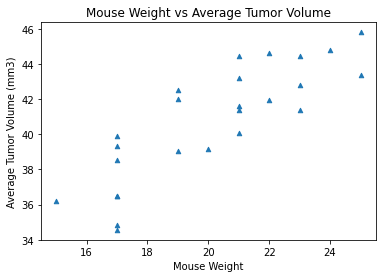

In [470]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_data = combined_data_df[(combined_data_df["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupby_data = scatter_data.groupby(["Mouse ID","Weight (g)"])
scatter_data_df = groupby_data["Tumor Volume (mm3)"].mean().to_frame()
scatter_data_df = scatter_data_df.reset_index()


plt.figure()
scatter_data_df.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="^")

plt.title("Mouse Weight vs Average Tumor Volume")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig('ScatterPlot.png')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.8419363424694718
The equation of the regression line is: y = 0.95x + 21.55


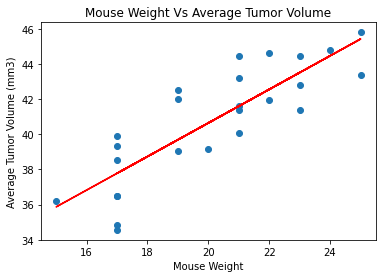

In [471]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(scatter_data_df["Weight (g)"], scatter_data_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatter_data_df["Weight (g)"]
y_values = scatter_data_df["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.xlim(13, 26)
# plt.ylim(30, 50)
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig('Correlation and Regression.png')
plt.show()
